<a href="https://colab.research.google.com/github/tasmia008/Bnagla-Handwritten-character-recognasition-/blob/main/bangla_handwritten_character_recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp /content/gdrive/MyDrive/combine_data.zip ./

In [ ]:
#!cp /content/gdrive/MyDrive/labeledFileList_update.csv ./

In [ ]:
!unzip combine_data.zip

Archive:  combine_data.zip
warning [combine_data.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [combine_data.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
replace combine_data/0/0_18_kis_2_361.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
from pathlib import Path

basefolderName = 'combine_data'
fd = open('labeledFileList.csv', 'w')
fd.write('image')
fd.write(',')
fd.write('label')
fd.write('\n')
for i in range(0,120):
    folderName  = str(basefolderName) + '/' + str(i)+ '/'
    folderPath = Path(folderName)
   # print(folderPath.name) 
    for filePath in folderPath.glob('*.jpg'):
        fileName = filePath
        folderName = filePath.parent.name
        fd.write(fileName.__str__())
        fd.write(',')
        fd.write(folderName)
        fd.write('\n')
        #print('fileName: '+ fileName.__str__()+  ' label '+folderName)
        #print('filePath:', filePath)
        

In [ ]:
#!wget -P<content/drive/MyDrive/male.tar.gz

# Kaggle and dataset

In [ ]:
! pip install kaggle

In [ ]:
%cd /content

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import tarfile 
#file =tarfile.open('male.tar.gz')
#file.exractall('combine_data')

In [ ]:
#!unzip ekush.zip # combine data

In [ ]:
#!wget https://drive.google.com/file/d/1C_Ye_YA3zkwW5kEUYUrAadSeJLObckYy/view?usp=share_link

# Imports

In [ ]:
import pandas as pd
import glob
import csv
import numpy as np
from collections import Counter
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score,f1_score
import time
import cv2
import copy
from tqdm.auto import tqdm
import h5py
import seaborn as sns

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd

#Import PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

#Import Matplotlib
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import tensorflow 
from tensorflow.python.keras.layers import Input, Dense
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.resnet import ResNet50
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade pip

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

In [ ]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score

# dataset

In [ ]:
PATH = '/content/'
os.listdir(PATH)

In [ ]:


# Set file path
file_path = '/content/labeledFileList.csv'

# Read file
df = pd.read_csv(file_path)

# Display file contents
print(df.head())


In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('/labeledFileList.csv')

In [ ]:
a_csv

In [ ]:
#a_csv.columns = [''] * len(a_csv.columns) # drop header columns 
#print(a_csv) 


In [ ]:
#a_csv.drop(a_csv.index[0])
#print(a_csv)

In [ ]:
a_csv_label = a_csv.loc[: ,'label']
a_csv_label

In [ ]:
a_csv_label = a_csv.loc[: ,'label']
a_csv_label


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['image', 'label']]
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv.head()

In [ ]:
data_csv = dropColumns(a_csv)
#data_csv=a_csv
#print(data_csv.iloc[:5, :])  


In [ ]:
TRAIN_PATH = '/content'
# train

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df# amdr csv thkee crete kora df or code data_csv csv content direct orginal image ache
        self.root = root # je dritory te fileache 
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
dml = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#dml=torch.device("cpu")
dml

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize((50,50)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

dataset  = Dataset(data_csv, TRAIN_PATH, train_transform)
print(data_csv)
# print(dataset)
# for i in dataset:
#   print(i)
print("Trainig Samples: ",len(dataset))

In [ ]:
img = dataset[131][0]
plt.imshow(img[0,:,:],cmap='gray')
print(dataset[131][1])

In [ ]:
#dataset = df

In [ ]:
train_len = int(len(dataset)*.7)
val_len = int(len(dataset)*.15)
test_len = int(len(dataset)-train_len-val_len)

In [ ]:
print(train_len)
print(val_len)
print(test_len)
train_len+val_len+test_len

In [ ]:
train,val,test= torch.utils.data.random_split(dataset, [train_len, val_len,test_len])

In [ ]:
len(train)

In [ ]:
img = dataset[131][0]
plt.imshow(img[0,:,:],cmap='gray')
print(dataset[131][1])

In [ ]:
print(train[131][0])

In [ ]:
img = train[131][0]
plt.imshow(img[0,:,:],cmap='gray')
print(train[131][1])

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=8, drop_last=True, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=8, drop_last=True, shuffle=False)

validation_loader = torch.utils.data.DataLoader(dataset=val, batch_size=8, drop_last=True, shuffle=False)

In [ ]:
dataloaders = {"train" : train_loader,
               "val" : validation_loader}

# CNN

In [ ]:
def create_model():
    model = torchvision.models.resnet34(weights='ResNet34_Weights.DEFAULT')
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) 
    n_features = model.fc.in_features
    
    model.fc = nn.Sequential(
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
      ##  nn.Linear(128, 10)
        nn.Linear(128,120)
    )
    
    return model.to(dml)

In [ ]:
dml

In [ ]:
base_model = create_model()
base_model

In [ ]:
from torchsummary import summary
summary(base_model,(1,28,28))

# Model Train with CNN

In [ ]:
num_classes = 120
num_epochs = 3
learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(base_model.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
validation_loss = []
training_loss = []

def train_model():
    since = time.time()
    val_acc_history = []
    
    best_model_wts = copy.deepcopy(base_model.state_dict())
    best_acc = 0.0
    
    progress_bar_train = tqdm(range(num_epochs * len(train_loader)))
    progress_bar_eval = tqdm(range(num_epochs * len(validation_loader)))
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in dataloaders:
            if phase == 'train':
                base_model.train()  # Set model to training mode
            else:
                base_model.eval()   # Set model to evaluate mode
                
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(dml)
                labels = labels.to(dml)
                
                # zero the parameter gradients
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'): 
                    outputs = base_model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        progress_bar_train.update(1)
                    elif phase == 'val':
                        progress_bar_eval.update(1)
                        
                running_loss += loss.item() * inputs.size(0)
                preds = preds.cpu()
                labels = labels.data.cpu()
                running_corrects += (preds == labels).sum()
            
            print("Lenght: ", len(dataloaders[phase].dataset))
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = float(running_corrects) / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'train':
              training_loss.append(epoch_loss)
            elif phase == 'val':
              validation_loss.append(epoch_loss)
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(base_model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    base_model.load_state_dict(best_model_wts)
    return base_model, val_acc_history

In [ ]:
best_model, validation_acc_hist = train_model()

  0%|          | 0/95310 [00:00<?, ?it/s]

  0%|          | 0/20424 [00:00<?, ?it/s]

Epoch 0/2
----------
Lenght:  254167
train Loss: 2.0261 Acc: 0.5359
Lenght:  54464
val Loss: 0.3522 Acc: 0.9071

Epoch 1/2
----------
Lenght:  254167
train Loss: 0.4030 Acc: 0.8934
Lenght:  54464
val Loss: 0.2308 Acc: 0.9408

Epoch 2/2
----------
Lenght:  254167
train Loss: 0.2709 Acc: 0.9287
Lenght:  54464
val Loss: 0.2067 Acc: 0.9488

Training complete in 53m 4s
Best val Acc: 0.948792


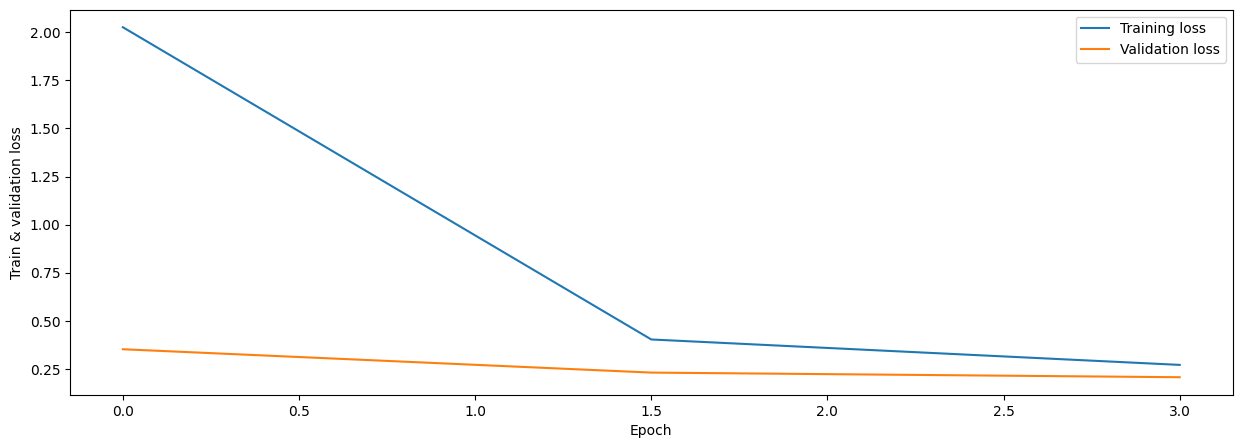

In [ ]:
x = torch.linspace(0, num_epochs, num_epochs)
plt.figure(figsize=(15,5))
plt.plot(x, training_loss)
plt.plot(x, validation_loss)
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epoch")
plt.ylabel("Train & validation loss")
plt.show()

# Model Save

In [ ]:
cnnmodel = best_model

In [ ]:
deitmodel = best_model
#model_ft

In [ ]:
cnnmodel_path = '/content//content/cnnmodel_path'

In [ ]:
deitmodel_path = '/content//content/cnnmodel_path'

In [ ]:
#torch.save(cnnmodel.state_dict(), cnnmodel_path)

In [ ]:
#torch.save(deitmodel.state_dict(), deitmodel_path)

# Model Load

resnet34 load

In [ ]:
if torch.cuda.is_available():
  best_model.load_state_dict(torch.load(cnnmodel_path))
else:
  best_model.load_state_dict(torch.load(cnnmodel_path, map_location=torch.device('cpu')))

FileNotFoundError: ignored

transformer laod

In [ ]:
if torch.cuda.is_available():
  model_ft.load_state_dict(torch.load(deitmodel_path))
else:
  model_ft.load_state_dict(torch.load(deitmodel_path, map_location=torch.device('cpu')))

# Model test with resnet

In [ ]:
def get_predictions():
    best_model.eval()
    predictions = []
    real_values = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(dml)
            labels = labels.to(dml)
            
            outputs = best_model(images)
            
            _, preds = torch.max(outputs, dim = 1)
            preds = preds.cpu()
            labels = labels.cpu()
            predictions.extend(preds)
            real_values.extend(labels)
            
    return predictions, real_values

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

In [ ]:
pred, real = get_predictions()
print('Result form resnet')
print(classification_report([y_actual.item() for y_actual in real], [y_pred.item() for y_pred in pred],digits=6))

In [ ]:
def score_in_details(y_pred,y_real):
  accuracy = recall_score(y_real, y_pred, average='weighted')
  precision = precision_score(y_real, y_pred, average='weighted')
  recall = recall_score(y_real, y_pred, average='weighted')
  f1 = f1_score(y_real, y_pred, average='weighted')

  print(f"Accuracy: {accuracy * 100}%")
  print(f"Precision: {precision * 100}%")
  print(f"Recall: {recall * 100}%")
  print(f"F1-score: {f1 * 100}%")
  
  print()
  print()

  conf_matrix = confusion_matrix(y_real, y_pred)
  fig, ax = plt.subplots(figsize=(15,15))
  sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g', xticklabels=[0, 1,2,3,4,5,6,7,8,9], yticklabels=[0, 1,2,3,4,5,6,7,8,9])
  plt.title('Confusion matrix', fontsize=20)
  plt.ylabel('Actual label', fontsize=20)
  plt.xlabel('Predicted label', fontsize=20)
  plt.show()

In [ ]:
print('Result form resnet')
score_in_details([y_actual.item() for y_actual in real], [y_pred.item() for y_pred in pred])

In [ ]:
multilabel_confusion_matrix(real, pred)

# Model test with transformer

In [ ]:
#best_model = model_ft

In [ ]:
def get_predictions():
    best_model.eval()
    predictions = []
    real_values = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(dml)
            labels = labels.to(dml)
            
            outputs = best_model(images)
            
            _, preds = torch.max(outputs, dim = 1)
            preds = preds.cpu()
            labels = labels.cpu()
            predictions.extend(preds)
            real_values.extend(labels)
            
    return predictions, real_values

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

In [ ]:
pred, real = get_predictions()
print('Result form DEiT')
print(classification_report([y_actual.item() for y_actual in real], [y_pred.item() for y_pred in pred],digits=6))

In [ ]:
def score_in_details(y_pred,y_real):
  accuracy = recall_score(y_real, y_pred, average='weighted')
  precision = precision_score(y_real, y_pred, average='weighted')
  recall = recall_score(y_real, y_pred, average='weighted')
  f1 = f1_score(y_real, y_pred, average='weighted')

  print(f"Accuracy: {accuracy * 100}%")
  print(f"Precision: {precision * 100}%")
  print(f"Recall: {recall * 100}%")
  print(f"F1-score: {f1 * 100}%")
  
  print()
  print()

  conf_matrix = confusion_matrix(y_real, y_pred)
  fig, ax = plt.subplots(figsize=(15,15))
  sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g', xticklabels=[0, 1,2,3,4,5,6,7,8,9], yticklabels=[0, 1,2,3,4,5,6,7,8,9])
  plt.title('Confusion matrix', fontsize=20)
  plt.ylabel('Actual label', fontsize=20)
  plt.xlabel('Predicted label', fontsize=20)
  plt.show()

In [ ]:
print('Result from Transfer')
score_in_details([y_actual.item() for y_actual in real], [y_pred.item() for y_pred in pred])

In [ ]:
multilabel_confusion_matrix(real, pred)

# Lime

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image
import lime.lime_tabular

In [ ]:
for images, label in test_loader:
    break
images.size()

In [ ]:
img = test[131][0]
img.size()

In [ ]:

plt.imshow(img[0,:,:],cmap='gray')
print(test[131][1])

In [ ]:
best_model.eval()
logits = best_model(images.to(dml))

In [ ]:
idx2label = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
#probs = torch.softmax(logits, dim=1)
#probs5 = probs.topk(10)
#tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().cpu().numpy(), probs5[1][0].detach().cpu().numpy()))

In [ ]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(i for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [ ]:
#test_pred = batch_predict(images)
#test_pred = test_pred.squeeze().argmax()

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
#exp = explainer.explain_instance(images, 
                                 batch_predict, 
                                 top_labels=5, 
                                 hide_color=0, 
                                 num_samples=1000)

In [ ]:
print(lime_image.LimeImageExplainer())

In [ ]:
images.size()

In [ ]:
img.unsqueeze_(-1)

In [ ]:
#img = images[0].expand(3,224,224)

In [ ]:
img = img.permute(1,2,0)
img.size()

In [ ]:
#img = img.type('torch.DoubleTensor') 

In [ ]:
img.dtype

In [ ]:
#explanation = explainer.explain_instance(np.array(img), 
                                         batch_predict, # classification function
                                         top_labels=10, 
                                         num_samples=1)

In [ ]:
from skimage.segmentation import mark_boundaries

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)